# Atividade Ponderada

Este é o notebook da atividade ponderada do módulo 7, em que foram feitas as análises dos dados e a criação do modelo

# Instalação das bibliotecas

In [39]:
!pip install pandas yfinance matplotlib statsmodels

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Importação dos dados

Os dois cripto ativos escolhidos foram o Bitcoin e o Dogecoin

## Bitcoin

In [41]:
bitcoin = yf.Ticker('BTC-USD') #ação do Bitcoin
bitcoin = bitcoin.history(period='1y')
bitcoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-23 00:00:00+00:00,26578.556641,26634.185547,26520.519531,26579.390625,7404700301,0.0,0.0
2023-09-24 00:00:00+00:00,26579.373047,26716.058594,26221.050781,26256.826172,8192867686,0.0,0.0
2023-09-25 00:00:00+00:00,26253.775391,26421.507812,26011.468750,26298.480469,11997833257,0.0,0.0
2023-09-26 00:00:00+00:00,26294.757812,26389.884766,26090.712891,26217.250000,9985498161,0.0,0.0
2023-09-27 00:00:00+00:00,26209.498047,26817.841797,26111.464844,26352.716797,11718380997,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19 00:00:00+00:00,61651.156250,63872.441406,61609.867188,62940.457031,42710252573,0.0,0.0
2024-09-20 00:00:00+00:00,62941.425781,64119.531250,62364.605469,63192.976562,35177164222,0.0,0.0
2024-09-21 00:00:00+00:00,63184.339844,63543.359375,62783.105469,63394.839844,14408616220,0.0,0.0


## Dogecoin

In [42]:
dogecoin = yf.Ticker('DOGE-USD') #ação da Dogecoin
dogecoin = dogecoin.history(period='1y')
dogecoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-23 00:00:00+00:00,0.061528,0.061846,0.061378,0.061507,117222607,0.0,0.0
2023-09-24 00:00:00+00:00,0.061507,0.061743,0.060702,0.060743,115250326,0.0,0.0
2023-09-25 00:00:00+00:00,0.060742,0.061200,0.060545,0.060959,117409471,0.0,0.0
2023-09-26 00:00:00+00:00,0.060956,0.061116,0.059907,0.060599,141794234,0.0,0.0
2023-09-27 00:00:00+00:00,0.060593,0.061332,0.060275,0.060504,153818653,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19 00:00:00+00:00,0.103585,0.107074,0.103585,0.105031,656532122,0.0,0.0
2024-09-20 00:00:00+00:00,0.105031,0.107296,0.103748,0.105471,595150523,0.0,0.0
2024-09-21 00:00:00+00:00,0.105471,0.110373,0.104152,0.110049,502306053,0.0,0.0


# Análise dos dados

Construção de gráficos, para exibir o histórico dos preços no último ano em dolar

## Bitcoin

<Axes: title={'center': 'Preço de Fechamento da Ação do Bitcoin'}, xlabel='Date'>

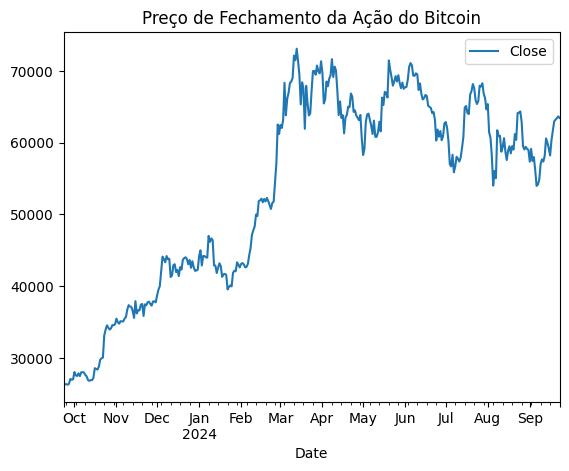

In [43]:
bitcoin.plot(y='Close', title='Preço de Fechamento da Ação do Bitcoin') #em dolar!!

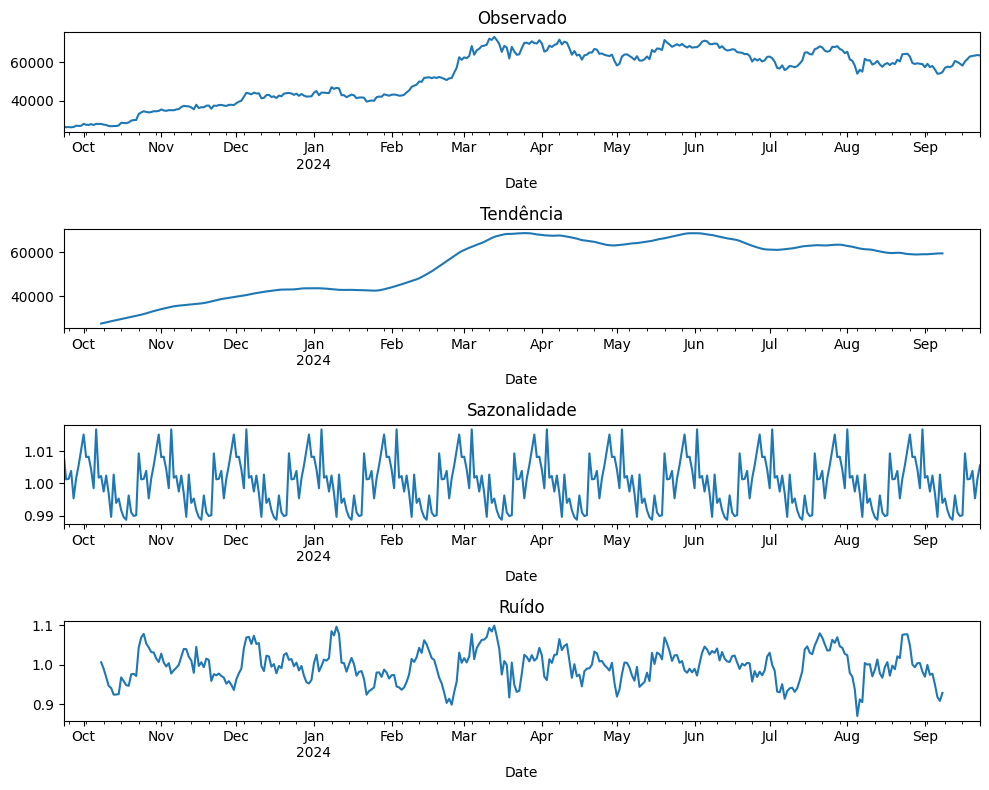

In [44]:
# Decompondo a série temporal
decomposition = seasonal_decompose(bitcoin['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído') # o ruído tenta mostrar o gráfico ignorando o efeito da sazonalidade
plt.tight_layout()

## Dogecoin

<Axes: title={'center': 'Preço de Fechamento da Ação do Dogecoin'}, xlabel='Date'>

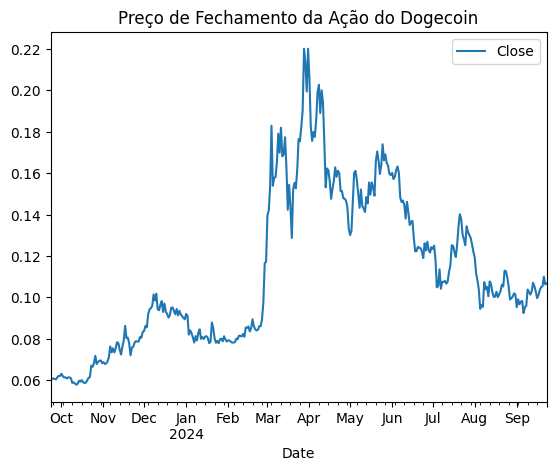

In [45]:
dogecoin.plot(y='Close', title='Preço de Fechamento da Ação do Dogecoin') #em dolar!!

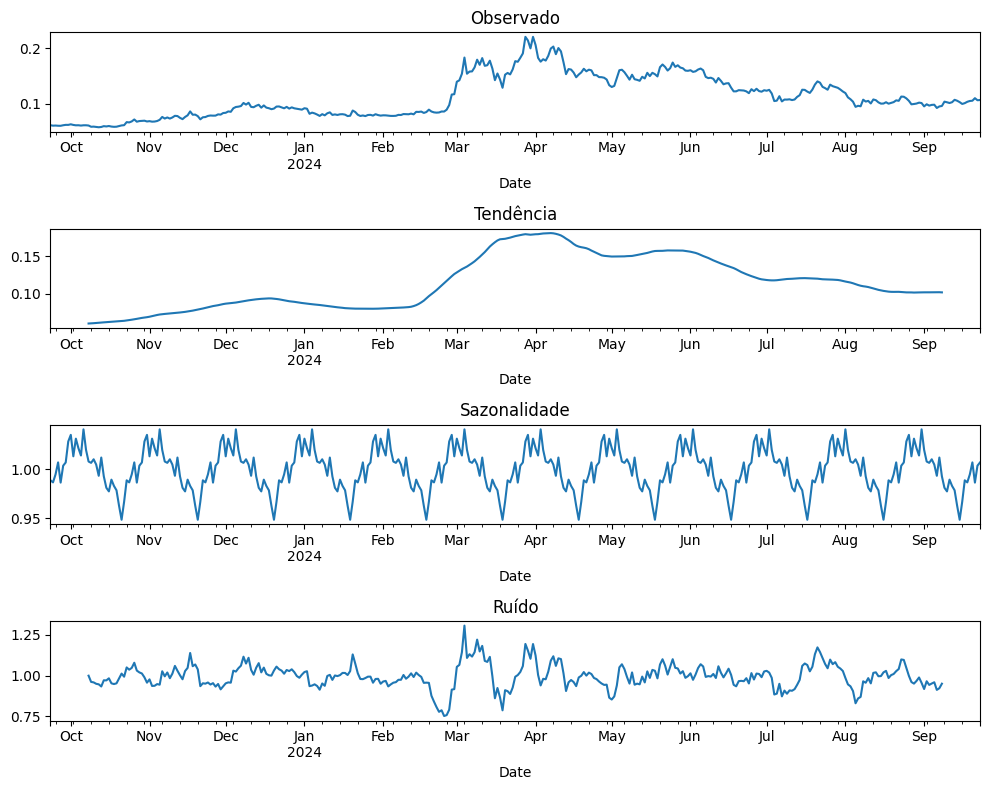

In [46]:
# Decompondo a série temporal
decomposition = seasonal_decompose(dogecoin['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído') # o ruído tenta mostrar o gráfico ignorando o efeito da sazonalidade
plt.tight_layout()

# Modelo

Implementação do modelo LSTM para realizar a predição dos preços nos próximos 100 dias

In [47]:
class Predicao:
    def __init__(self, data, time_step=30, train_size=0.7, units=50, epochs=100, batch_size=32):
        self.data = data['Close'].values.reshape(-1, 1)
        self.time_step = time_step
        self.train_size = train_size
        self.units = units
        self.epochs = epochs
        self.batch_size = batch_size
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None

    def preprocess_data(self):
        self.data_scaled = self.scaler.fit_transform(self.data)
        train_size = int(len(self.data_scaled) * self.train_size)
        self.train_data, self.test_data = self.data_scaled[:train_size], self.data_scaled[train_size:]

    def create_dataset(self, data):
        X, y = [], []
        for i in range(len(data) - self.time_step):
            X.append(data[i:(i + self.time_step), 0])
            y.append(data[i + self.time_step, 0])
        return np.array(X), np.array(y)

    def prepare_data(self):
        self.X_train, self.y_train = self.create_dataset(self.train_data)
        self.X_test, self.y_test = self.create_dataset(self.test_data)

        self.X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1], 1)
        self.X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1], 1)

    def build_model(self):
        self.model = Sequential()
        self.model.add(LSTM(units=self.units, input_shape=(self.X_train.shape[1], self.X_train.shape[2])))
        self.model.add(Dense(units=1))
        self.model.compile(optimizer='adam', loss='mean_squared_error')

    def train_model(self):
        self.model.fit(self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size, verbose=1)

    def predict_future(self, days_to_predict=100, start_date="2024-09-20"):
        recent_data = self.data_scaled[-self.time_step:].reshape(1, self.time_step, 1)
        predicted_prices = []

        for i in range(days_to_predict):
            predicted_price = self.model.predict(recent_data)
            predicted_prices.append(predicted_price[0, 0])
            recent_data = np.append(recent_data[:, 1:, :], np.array(predicted_price).reshape(1, 1, 1), axis=1)

        predicted_prices = self.scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

        predicted_dates = pd.date_range(start=start_date, periods=days_to_predict).strftime('%d/%m/%Y')
        predicted_data = pd.DataFrame(predicted_prices, index=predicted_dates, columns=['Predicted Price'])

        return predicted_data

    def run(self, days_to_predict=100, start_date="2024-09-20"):
        self.preprocess_data()
        self.prepare_data()
        self.build_model()
        self.train_model()
        return self.predict_future(days_to_predict, start_date)

## Bitcoin

In [48]:
predictor = Predicao(bitcoin)
predicted_data = predictor.run(days_to_predict=100, start_date="2024-09-20")
print(predicted_data)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4229
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1898
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0198
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0247
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0116
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0112
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0061
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0070
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0059
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0049
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0048
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0044
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0048
Epoch 16/100
8/8 ━━━━━━━━━━━━━━

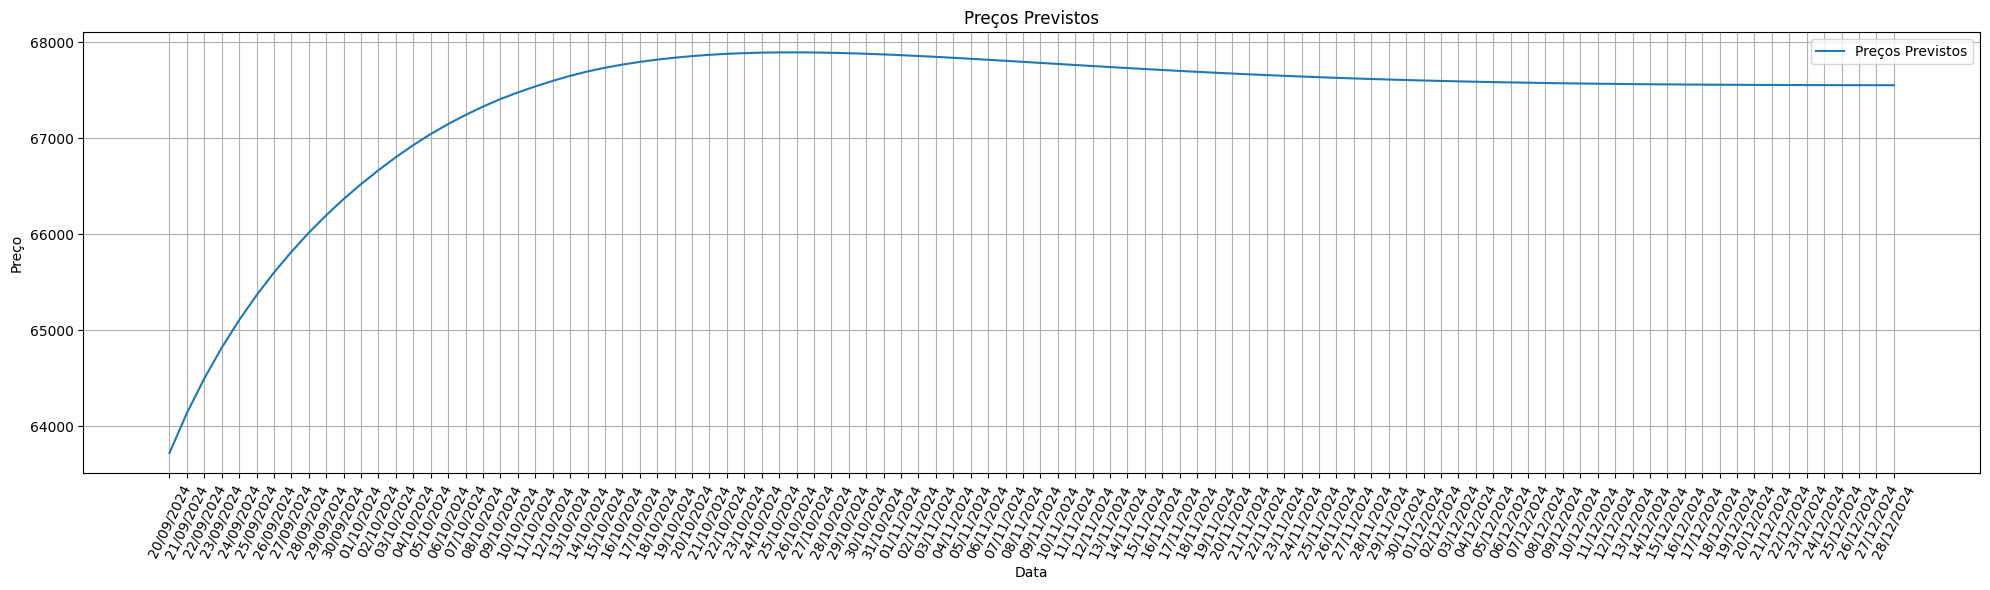

In [49]:
# Gráfico dos preços antigos e das previsões
plt.figure(figsize=(20, 6))

# Plotar as previsões
plt.plot(predicted_data.index, predicted_data['Predicted Price'], label='Preços Previstos')

# Ajustes no gráfico
plt.title('Preços Previstos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.xticks(rotation=64)
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [50]:
# Encontrar o menor e o maior valor de previsão
min_price_date = predicted_data['Predicted Price'].idxmin()
max_price_date = predicted_data['Predicted Price'].idxmax()

# Imprimir a data do menor e maior preço
print(f"A data com o menor preço previsto é: {min_price_date}, com o valor de: {predicted_data['Predicted Price'].min()}")
print(f"A data com o maior preço previsto é: {max_price_date}, com o valor de: {predicted_data['Predicted Price'].max()}")

A data com o menor preço previsto é: 20/09/2024, com o valor de: 63724.453125
A data com o maior preço previsto é: 26/10/2024, com o valor de: 67893.71875


## Dogecoin

In [51]:
predictor = StockPredictorGrupo3(dogecoin)
predicted_data = predictor.run(days_to_predict=100, start_date="2024-09-20")
print(predicted_data)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1933
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0712
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0143
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0100
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0086
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0075
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0083
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0071
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0086
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0081
Epoch 16/100
8/8 ━━━━━━━━━━━━━━

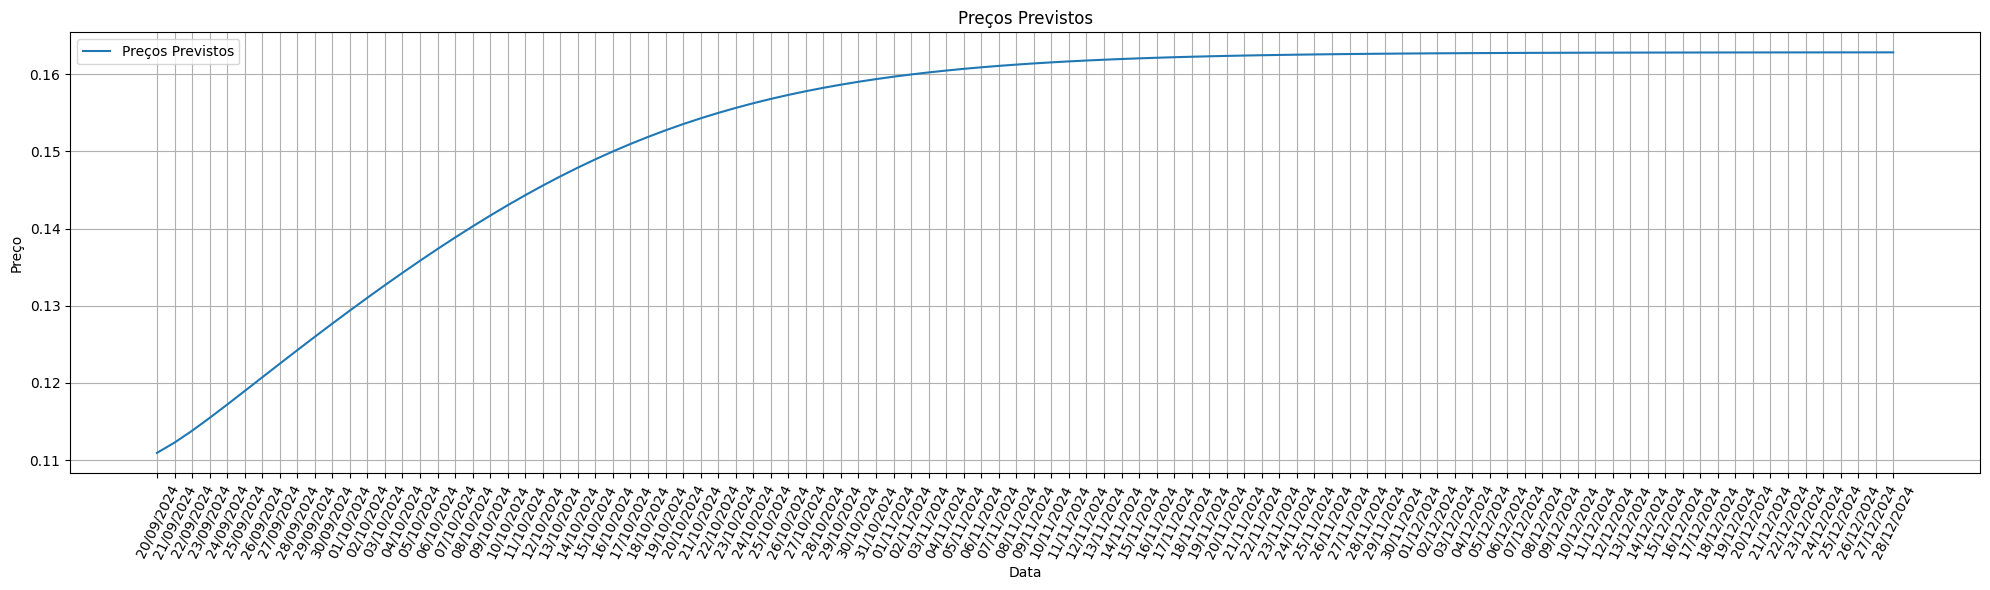

In [52]:
# Gráfico dos preços antigos e das previsões
plt.figure(figsize=(20, 6))

# Plotar as previsões
plt.plot(predicted_data.index, predicted_data['Predicted Price'], label='Preços Previstos')

# Ajustes no gráfico
plt.title('Preços Previstos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.xticks(rotation=64)
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [53]:
# Encontrar o menor e o maior valor de previsão
min_price_date = predicted_data['Predicted Price'].idxmin()
max_price_date = predicted_data['Predicted Price'].idxmax()

# Imprimir a data do menor e maior preço
print(f"A data com o menor preço previsto é: {min_price_date}, com o valor de: {predicted_data['Predicted Price'].min()}")
print(f"A data com o maior preço previsto é: {max_price_date}, com o valor de: {predicted_data['Predicted Price'].max()}")

A data com o menor preço previsto é: 20/09/2024, com o valor de: 0.11094281077384949
A data com o maior preço previsto é: 28/12/2024, com o valor de: 0.16284765303134918
